In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

data = pd.read_csv('Warehouse_and_Retail_Sales.csv')

In [2]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


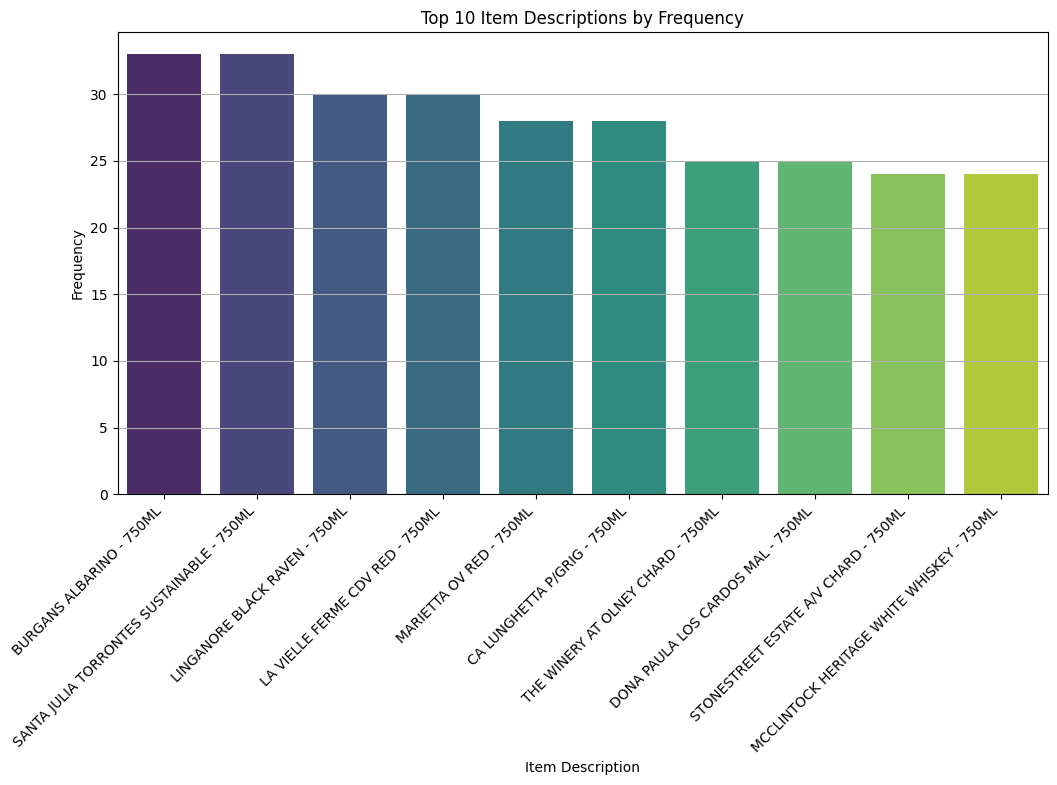

In [3]:
# Count the frequency of each item description and get the top 10
top_item_descriptions = data['ITEM DESCRIPTION'].value_counts().head(10)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top_item_descriptions.index, y=top_item_descriptions.values, hue=top_item_descriptions.index, palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Item Descriptions by Frequency")
plt.xlabel("Item Description")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

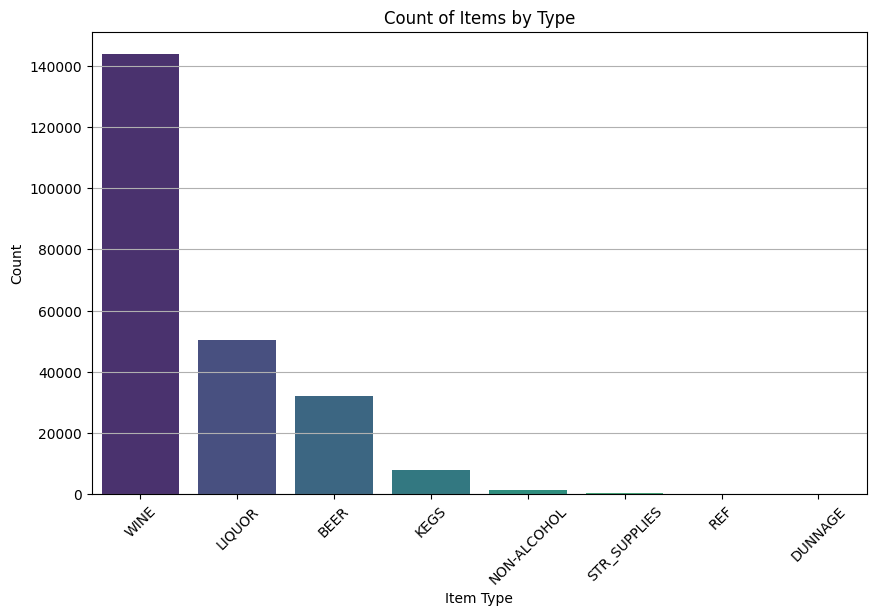

In [4]:
# Count the frequency of each item type
item_counts = data['ITEM TYPE'].value_counts()

# Plotting the bar graph with hue assigned and legend turned off
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.index, y=item_counts.values, hue=item_counts.index, palette="viridis", dodge=False)
plt.title("Count of Items by Type")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
ax = plt.gca()
if ax.get_legend() is not None:
	ax.get_legend().remove()
plt.show()

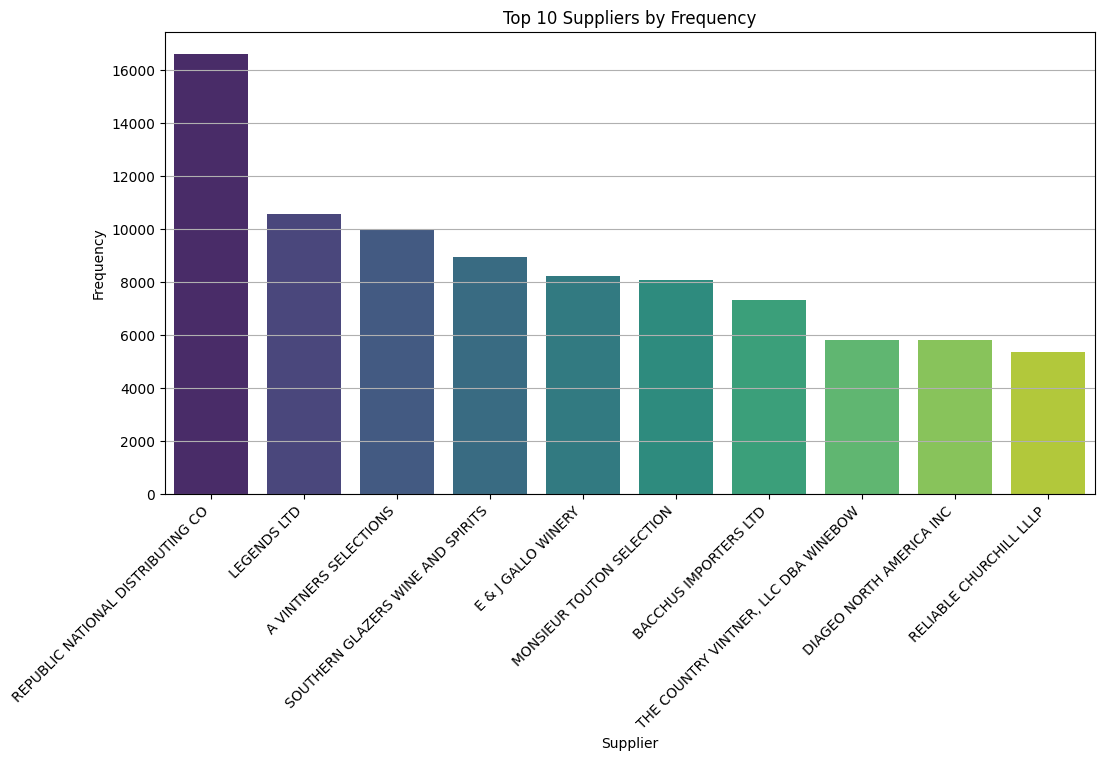

In [5]:
# Count the frequency of each supplier
supplier_counts = data['SUPPLIER'].value_counts().head(10)  # Display top 10 suppliers for better visualization

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=supplier_counts.index, y=supplier_counts.values, hue=supplier_counts.index, palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Suppliers by Frequency")
plt.xlabel("Supplier")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

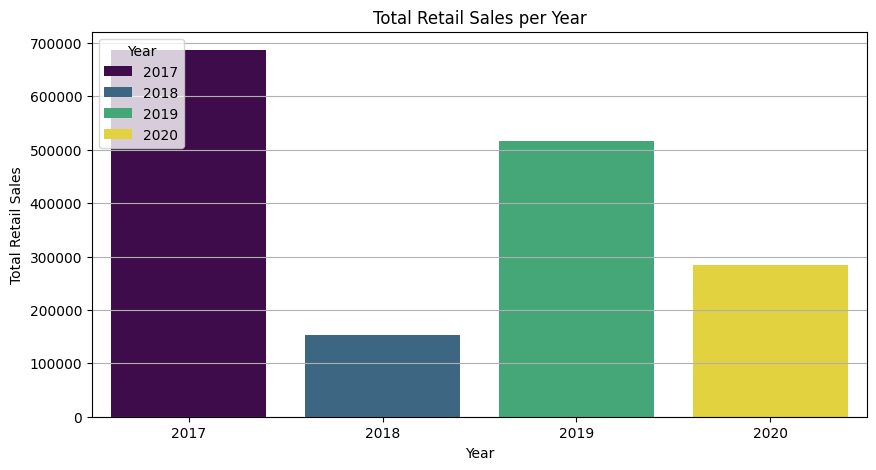

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

yearly_sales = data.groupby('YEAR')['RETAIL SALES'].sum().reset_index()

# Creating a bar plot with color based on the YEAR variable
plt.figure(figsize=(10, 5))
sns.barplot(x='YEAR', y='RETAIL SALES', hue='YEAR', data=yearly_sales, palette='viridis', dodge=False)
plt.title('Total Retail Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Retail Sales')
plt.grid(axis='y')
plt.legend(title='Year', loc='upper left')
plt.show()

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Handle missing values
data['SUPPLIER'].fillna('Unknown', inplace=True)
data['ITEM TYPE'].fillna('Unknown', inplace=True)
data['RETAIL SALES'].fillna(0, inplace=True)

# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['SUPPLIER', 'ITEM TYPE'], drop_first=True)

# Drop unnecessary columns
data.drop(columns=['ITEM CODE', 'ITEM DESCRIPTION'], inplace=True)

# Normalize numerical columns
scaler = StandardScaler()
numerical_columns = ['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Pre-processing completed. Dataset is ready for modeling.")

Pre-processing completed. Dataset is ready for modeling.


In [11]:
# Separate features and target
X = data.drop(columns=['RETAIL SALES'])
y = data['RETAIL SALES']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Machine Learning Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")
lr_rsme = np.sqrt(lr_mse)
print(f"Linear Regression RMSE: {lr_rsme}")
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression R^2 Score: {lr_r2}")
lr_mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")
lr_mape = mean_absolute_percentage_error(y_test, lr_predictions)
print(f"Linear Regression MAPE: {lr_mape}")

Linear Regression MSE: 0.03549917938610151
Linear Regression RMSE: 0.1884122591184064
Linear Regression R^2 Score: 0.9683704792012995
Linear Regression MAE: 0.055095573528485785
Linear Regression MAPE: 1.6465969207568616


In [14]:
# Replace the linear regression with a Ridge model (regularized) and tune alpha via GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge = grid_search.best_estimator_
print(f"Best alpha: {best_alpha}")

ridge_predictions = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f"Ridge Regression MSE: {ridge_mse}")
ridge_rsme = np.sqrt(ridge_mse)
print(f"Ridge Regression RMSE: {ridge_rsme}")
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f"Ridge Regression R^2 Score: {ridge_r2}")
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
print(f"Ridge Regression MAE: {ridge_mae}")
ridge_mape = mean_absolute_percentage_error(y_test, ridge_predictions)
print(f"Ridge Regression MAPE: {ridge_mape}")

Best alpha: 100
Ridge Regression MSE: 0.035383504333158504
Ridge Regression RMSE: 0.18810503537427833
Ridge Regression R^2 Score: 0.9684735448652451
Ridge Regression MAE: 0.05510016357117371
Ridge Regression MAPE: 1.6472627416673613


In [16]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}")
dt_rsme = np.sqrt(dt_mse)
print(f"Decision Tree RMSE: {dt_rsme}")
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree R^2 Score: {dt_r2}")
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f"Decision Tree MAE: {dt_mae}")
dt_mape = mean_absolute_percentage_error(y_test, dt_predictions)
print(f"Decision Tree MAPE: {dt_mape}")

Decision Tree MSE: 0.05221867619351859
Decision Tree RMSE: 0.22851406125995527
Decision Tree R^2 Score: 0.9534735243657448
Decision Tree MAE: 0.06509762899793162
Decision Tree MAPE: 1.6261148218633958


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

gbr_predictions = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_mape = mean_absolute_percentage_error(y_test, gbr_predictions)

print(f"Gradient Boosting Regressor MSE: {gbr_mse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")
print(f"Gradient Boosting Regressor R^2 Score: {gbr_r2}")
print(f"Gradient Boosting Regressor MAE: {gbr_mae}")
print(f"Gradient Boosting Regressor MAPE: {gbr_mape}")

Gradient Boosting Regressor MSE: 0.032892325762276305
Gradient Boosting Regressor RMSE: 0.181362415517318
Gradient Boosting Regressor R^2 Score: 0.9706931675659276
Gradient Boosting Regressor MAE: 0.05423565387008751
Gradient Boosting Regressor MAPE: 1.5242528748374358


In [19]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# XGBoost Regressor
xgboost_model = XGBRegressor(random_state=42)
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_rmse = np.sqrt(xgboost_mse)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
xgboost_mae = mean_absolute_error(y_test, xgboost_predictions)
xgboost_mape = mean_absolute_percentage_error(y_test, xgboost_predictions)

print(f"XGBoost MSE: {xgboost_mse}")
print(f"XGBoost RMSE: {xgboost_rmse}")
print(f"XGBoost R^2 Score: {xgboost_r2}")
print(f"XGBoost MAE: {xgboost_mae}")
print(f"XGBoost MAPE: {xgboost_mape}")

XGBoost MSE: 0.059698061449461354
XGBoost RMSE: 0.24433186744561453
XGBoost R^2 Score: 0.9468094443614911
XGBoost MAE: 0.052725586521938574
XGBoost MAPE: 1.4066146630962242


In [25]:
# LightGBM Regressor
lightgbm_model = LGBMRegressor(random_state=42)
lightgbm_model.fit(X_train, y_train)
lightgbm_predictions = lightgbm_model.predict(X_test)
lightgbm_mse = mean_squared_error(y_test, lightgbm_predictions)
lightgbm_rmse = np.sqrt(lightgbm_mse)
lightgbm_r2 = r2_score(y_test, lightgbm_predictions)
lightgbm_mae = mean_absolute_error(y_test, lightgbm_predictions)
lightgbm_mape = mean_absolute_percentage_error(y_test, lightgbm_predictions)

print(f"LightGBM MSE: {lightgbm_mse}")
print(f"LightGBM RMSE: {lightgbm_rmse}")
print(f"LightGBM R^2 Score: {lightgbm_r2}")
print(f"LightGBM MAE: {lightgbm_mae}")
print(f"LightGBM MAPE: {lightgbm_mape}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.622150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 188668, number of used features: 293
[LightGBM] [Info] Start training from score -0.000329
LightGBM MSE: 0.05578385975603731
LightGBM RMSE: 0.23618607019897958
LightGBM R^2 Score: 0.9502969707216338
LightGBM MAE: 0.053531800091103324
LightGBM MAPE: 1.4819021092697624


In [23]:
!pip install catboost -q
from catboost import CatBoostRegressor

# CatBoost Regressor
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_predictions)
catboost_rmse = np.sqrt(catboost_mse)
catboost_r2 = r2_score(y_test, catboost_predictions)
catboost_mae = mean_absolute_error(y_test, catboost_predictions)
catboost_mape = mean_absolute_percentage_error(y_test, catboost_predictions)
print(f"CatBoost MSE: {catboost_mse}")
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost R^2 Score: {catboost_r2}")
print(f"CatBoost MAE: {catboost_mae}")
print(f"CatBoost MAPE: {catboost_mape}")

CatBoost MSE: 0.04300776561308178
CatBoost RMSE: 0.2073831372438024
CatBoost R^2 Score: 0.9616803813358797
CatBoost MAE: 0.051364606660910486
CatBoost MAPE: 1.4335095684398886


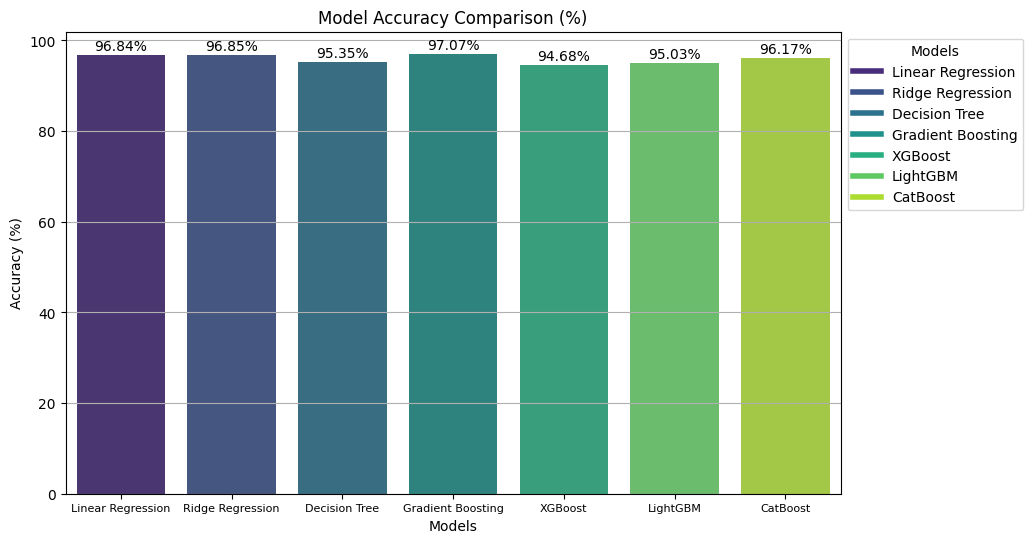

In [28]:
# Accuracy scores for each model
model_accuracies = {
    "Linear Regression": lr_r2 * 100,
    "Ridge Regression": ridge_r2 * 100,
    "Decision Tree": dt_r2 * 100,
    "Gradient Boosting": gbr_r2 * 100,
    "XGBoost": xgboost_r2 * 100,
    "LightGBM": lightgbm_r2 * 100,
    "CatBoost": catboost_r2 * 100
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")

for index, value in enumerate(model_accuracies.values()):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

plt.title("Model Accuracy Comparison (%)")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.xticks(ha='center', fontsize=8)
plt.grid(axis='y')

num_models = len(model_accuracies)
colors = sns.color_palette("viridis", n_colors=num_models)
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_models)]
labels = [model for model in model_accuracies.keys()]
plt.legend(handles, labels, title="Models", loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

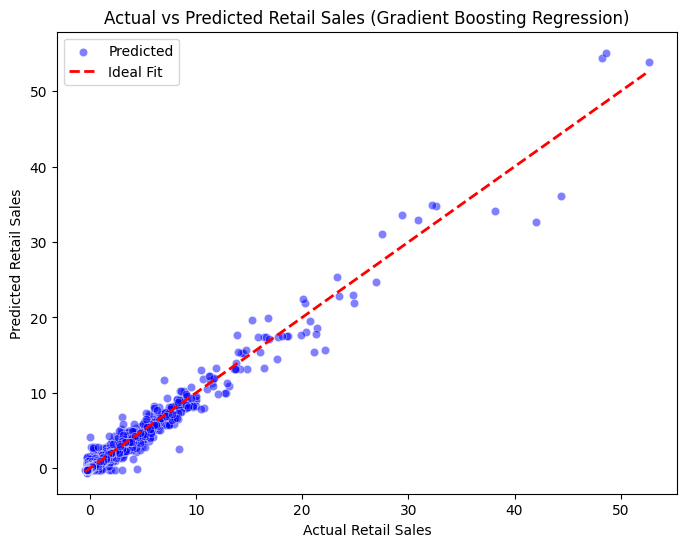

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=gbr_predictions, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Retail Sales")
plt.ylabel("Predicted Retail Sales")
plt.title("Actual vs Predicted Retail Sales (Gradient Boosting Regression)")
plt.legend()
plt.show()

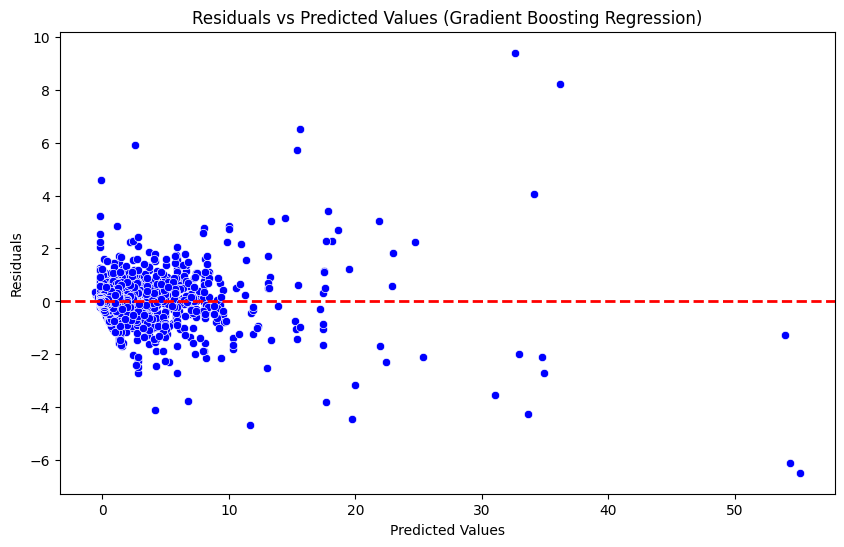

In [30]:
# Calculate the residuals
residuals = y_test - gbr_predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=gbr_predictions, y=residuals, color='blue')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title("Residuals vs Predicted Values (Gradient Boosting Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()